In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime
df = pd.read_csv('Gcalender.csv')
df.head()

,time,metric_name,metric_value
0,2015-03-23 00:00:00-04:00,google.calendar:num_1day_active_users,2197
1,2015-03-23 00:00:00-04:00,google.calendar:num_30day_active_users,6252
2,2015-03-23 00:00:00-04:00,google.calendar:num_7day_active_users,3953
3,2015-03-24 00:00:00-04:00,google.calendar:num_1day_active_users,2174
4,2015-03-24 00:00:00-04:00,google.calendar:num_30day_active_users,6324


In [2]:
df['time'] =  pd.to_datetime(df['time'], format='%Y%m%d %H:%M:%S.%f', utc=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a5476d8>]],
      dtype=object)

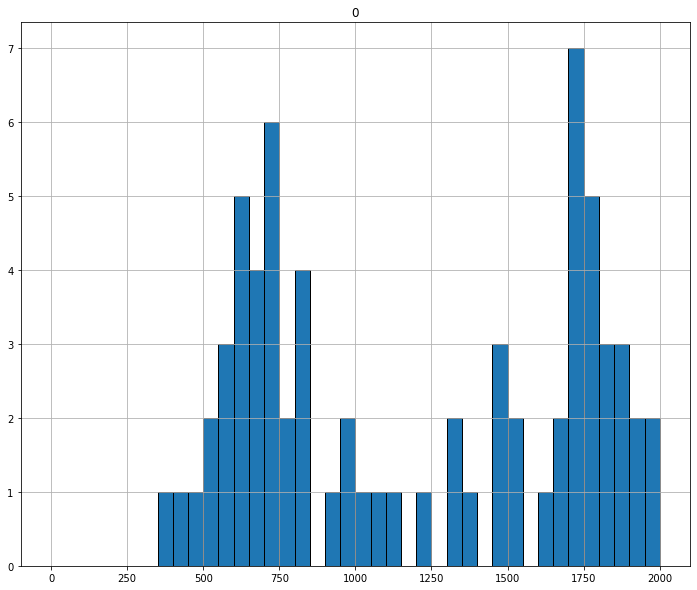

In [5]:
np.random.seed(6)
sample = np.random.choice(a= df['metric_value'],size=350)
pd.DataFrame(sample).hist(range=(0,2000), bins=40, ec='black', figsize=(12,10))


In [6]:
print (sample.mean())            


4440.34


In [7]:
df.mean()

metric_value    4347.498398
dtype: float64

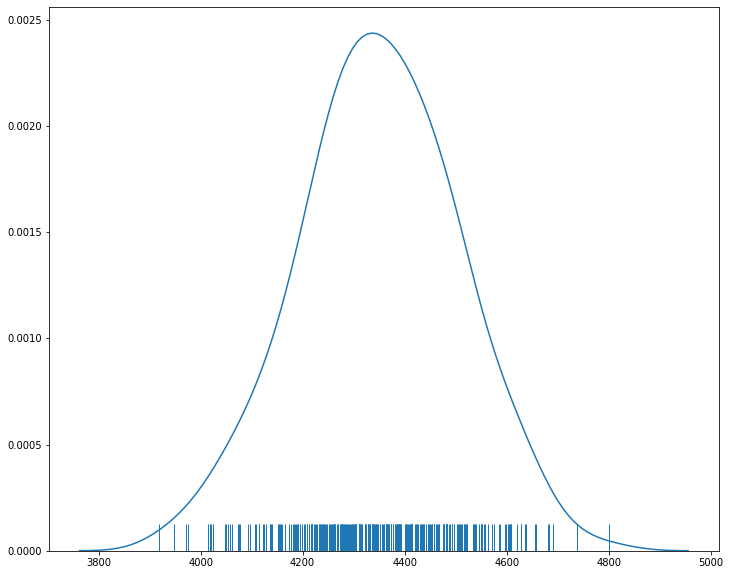

In [9]:
import seaborn as sns

np.random.seed(10)

point_estimates = []         # Make empty list to hold point estimates

for x in range(300):         # Generate 200 samples
    sample = np.random.choice(a= df['metric_value'], size=300)
    point_estimates.append( sample.mean() )
    
f, ax = plt.subplots(figsize=(12, 10))
sns.distplot( point_estimates, hist=False, rug=True); # Plot sample mean density

/Users/jackiecuong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/Users/jackiecuong/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: MatplotlibDeprecationWarning: Support for passing a (n, 1)-shaped error array to errorbar() is deprecated since Matplotlib 3.1 and will be removed in 3.3; pass a 1D array instead.


<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

<Figure size 864x720 with 0 Axes>

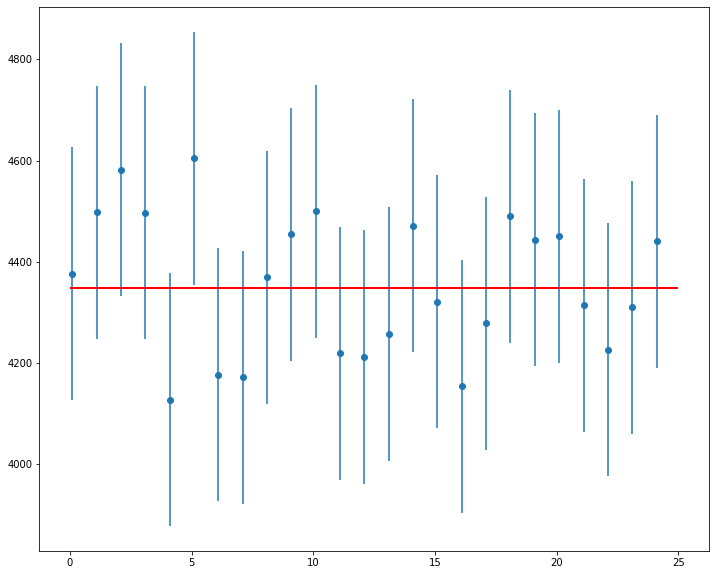

In [16]:
import scipy.stats as stats
import math


np.random.seed(12)

sample_size = 400

intervals = []
sample_means = []

for sample in range(25):
    sample = np.random.choice(a= df['metric_value'], size = sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value*         

    pop_stdev = df.std()  # Get the population standard deviation

    stats.norm.ppf(q = 0.025)

    margin_of_error = z_critical * (pop_stdev/math.sqrt(sample_size))

    confidence_interval = (sample_mean - margin_of_error,
                           sample_mean + margin_of_error)  
    
    intervals.append(confidence_interval)
    plt.figure(figsize=(12,10))

plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=df.mean(), 
           linewidth=2.0,
           color="red")